# Visualización con Pandas y Matplotlib

Recorrido por las visualizaciones la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).


Empezamos, importamos las librerias a utilizar.

In [6]:
!pip install wbdata -q

In [7]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
RUTA_GLOBAL = '/content/drive/MyDrive/ANALITICA DE DATOS/0_ManipulacionDatos/5_Visualizacion'

## World Bank Data API

Vemos el principal funcionamiento de la API.

Recorremos la (fuente?) de datos

!pip install wbdata --user

In [9]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

Seleccionamos algunos datos de educacion. [Barro-Lee dataset](http://www.barrolee.com/)

In [12]:
wbdata.get_indicators(source=12)

id                              name
------------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
AED.PRIM.MATH                   EDSTATS: Adjusted Primary Math Score
AED.PRIM.MEAN                   EDSTATS: Average Adjusted Primary Test Score
AED.PRIM.READ                   EDSTATS: Adjusted Primary Reading Score
AED.PRIM.SCNC                   EDSTATS: Adjusted Primary Science Score
AED.PRSC.MEAN                   EDSTATS: Average Adjusted Test Score
AED.SECO.MATH                   EDSTATS: Adjusted Secondary Math Score
AED.SECO.MEAN                   EDSTATS: Average Adjusted Secondary Test Score
AED.SECO.READ                   EDSTATS: Adjusted Secondary Reading Score
AED.SECO.SCNC                   EDSTATS: Adjusted Secondary Scien

## Graficando con Pandas

### Grafico de torta

In [14]:
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [15]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [16]:
df.head()

educacion_femenina  educacion_masculina
country   date                                         
Argentina 2020            8.494050             8.332441
          2019                 NaN                  NaN
          2018            8.796667             8.681369
          2017            8.970000             8.770000
          2016                 NaN                  NaN

Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

Text(0.5, 1.0, 'Educación masculina USA vs ARG')

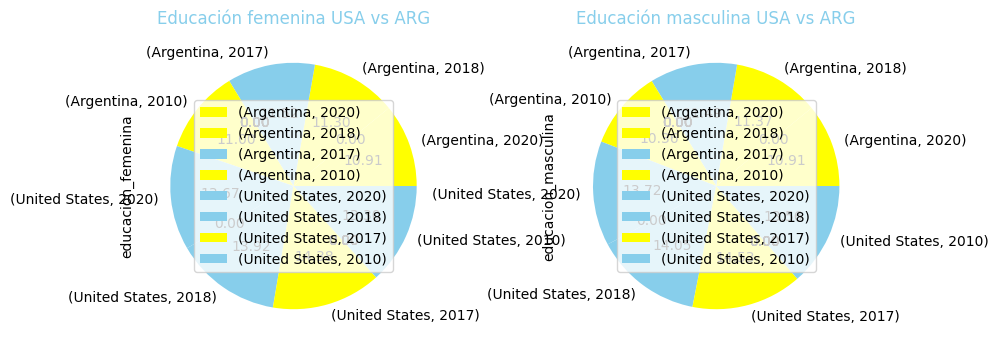

In [17]:
ax1, ax2 = df.plot.pie(subplots=True,figsize=(10,4), colors=['yellow', 'skyblue'],
                      autopct='%.2f')

ax1.set_title('Educación femenina USA vs ARG', color='skyblue')
ax2.set_title('Educación masculina USA vs ARG', color='skyblue')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años

In [21]:
# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24',
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'ARG')
df = pd.DataFrame(data=data)

In [22]:
print('Valores nulos:',sum(df.isna().sum()))

Valores nulos: 522


El dataset contiene va desde el año 1950 a 2010 y con ddatos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado.

In [23]:
df.dropna(inplace=True)
df

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50
1985,1.36,4.00,2.84,3.43,3.43,4.63,4.63,5.89,5.89
1980,1.30,1.90,3.30,3.30,4.40,4.40,5.40,5.40,6.80
1975,2.08,3.30,3.19,4.18,4.18,5.40,5.40,7.30,7.30
1970,2.70,3.10,4.00,4.00,5.40,5.40,7.70,7.70,11.90


Breve resumen descriptivo

In [24]:
df.describe()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.272222,1.946667,2.434444,2.831111,3.132222,3.492222,4.206667,4.761111,5.854444
std,0.788856,1.307851,1.358677,1.444043,1.669392,1.783716,2.152655,2.312074,3.038791
min,0.300000,0.250000,0.250000,0.290000,0.290000,0.720000,0.720000,1.200000,1.200000
25%,0.830000,1.300000,1.620000,2.050000,2.740000,2.740000,3.820000,4.090000,5.170000
50%,1.300000,1.800000,2.840000,3.430000,3.430000,3.820000,4.630000,5.170000,5.890000
75%,1.600000,3.100000,3.300000,4.000000,4.180000,4.630000,5.400000,5.890000,6.800000
max,2.700000,4.000000,4.000000,4.180000,5.400000,5.400000,7.700000,7.700000,11.900000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

([<matplotlib.axis.XTick at 0x7b285049c430>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

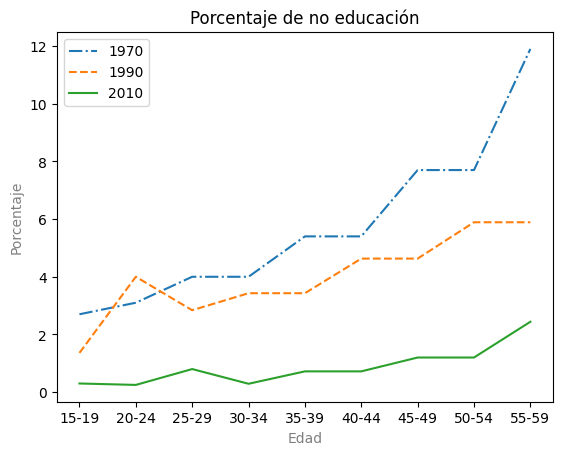

In [25]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Esta vez lo hacemos sólo para la población femenina.

In [26]:
# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24',
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'ARG')
df1.dropna(inplace = True)

Porcentaje no educado de la población femenina.

([<matplotlib.axis.XTick at 0x7b28504daf20>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

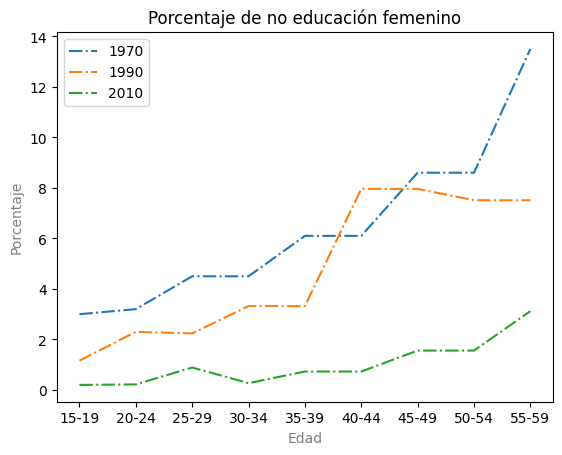

In [27]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010.

([<matplotlib.axis.XTick at 0x7b28504191e0>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

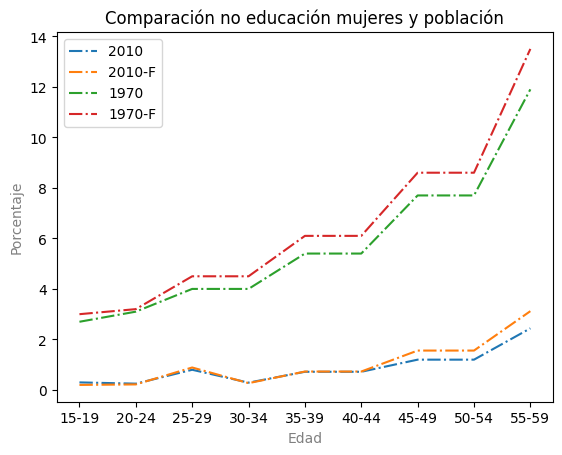

In [28]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True)
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [29]:
df.head(5)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50


Text(0, 0.5, 'Porcentaje')

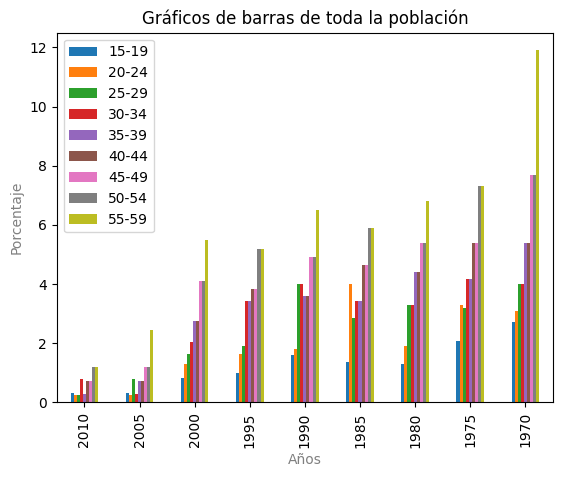

In [30]:
ax = df.plot(kind='bar',
       title='Gráficos de barras de toda la población')
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

Text(0, 0.5, 'Años')

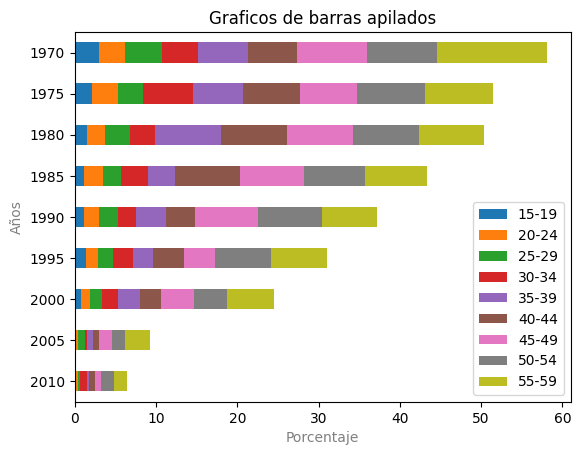

In [31]:
ax = df1.plot.barh(stacked=True)
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [32]:
paises = [i['id'] for i in wbdata.get_country(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"}

data = wbdata.get_dataframe(indicadores, country=paises, convert_date=True)
df = pd.DataFrame(data=data)

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 79 entries, ('Afghanistan', Timestamp('2019-01-01 00:00:00')) to ('United States', Timestamp('2019-01-01 00:00:00'))
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice_negocio  79 non-null     float64
 1   PIBPC           79 non-null     float64
dtypes: float64(2)
memory usage: 9.0+ KB


In [35]:
df.head()

,,indice_negocio,PIBPC
country,date,,
Afghanistan,2019-01-01,173.0,2079.921861
United Arab Emirates,2019-01-01,16.0,71782.153836
Antigua and Barbuda,2019-01-01,113.0,22908.639255
Australia,2019-01-01,14.0,49379.093334
Austria,2019-01-01,27.0,55806.438250


Text(0, 0.5, 'Frecuencia')

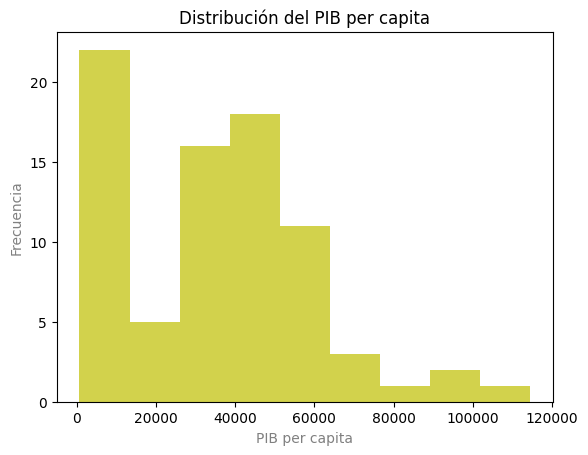

In [36]:
plt.figure()
df['PIBPC'].plot.hist(alpha=0.7,  # Con alpha seteamos la transparencia
                     color='y',
                     bins=9,
                     title='Distribución del PIB per capita')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

## Box plot

<Axes: title={'center': 'Diagrma de caja PIB'}>

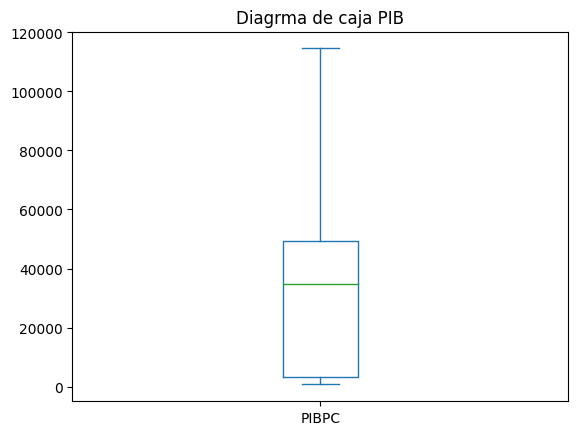

In [37]:
df['PIBPC'].plot.box(title='Diagrama de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

Text(0, 0.5, 'PIB per capita')

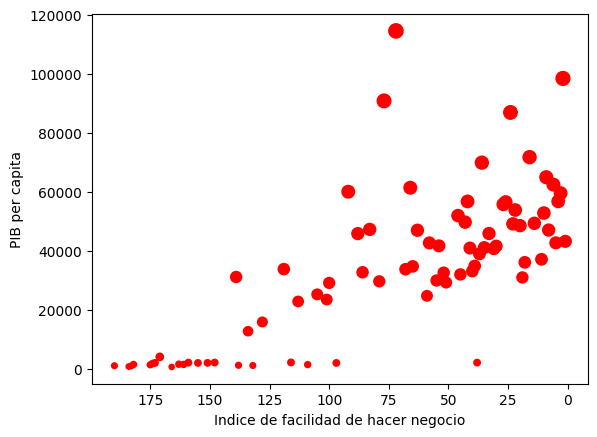

In [38]:
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r',
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               )

plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto.

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal.

Text(0, 0.5, 'PIB per capita')

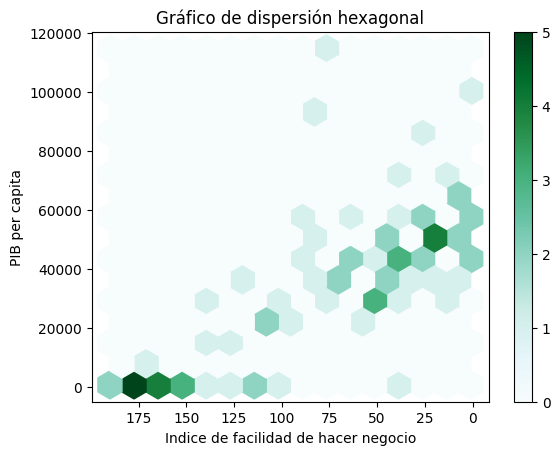

In [39]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')